In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
df=pd.read_csv('Exam_Score_Prediction.csv')

In [7]:
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [8]:
df.columns.to_frame

<bound method Index.to_frame of Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')>

In [9]:
df.groupby('gender')['age'].count()

gender
female    6579
male      6695
other     6726
Name: age, dtype: int64

In [10]:
df.shape

(20000, 13)

In [11]:
print(6579+6695+6726)

20000


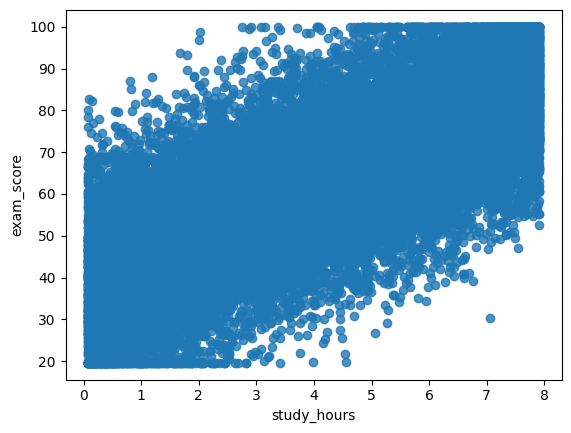

In [12]:
sns.regplot(data=df, x='study_hours', y='exam_score')
plt.show()

In [13]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [14]:
# course	study_hours	class_attendance	internet_access	sleep_hours	sleep_quality	study_method	facility_rating	exam_difficulty	exam_score

array([[<Axes: title={'center': 'student_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'study_hours'}>,
        <Axes: title={'center': 'class_attendance'}>],
       [<Axes: title={'center': 'sleep_hours'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

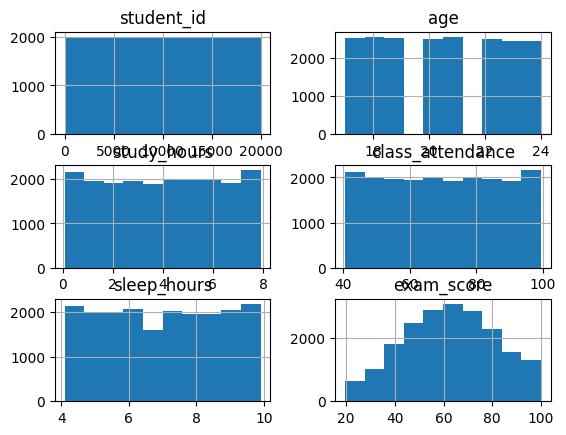

In [15]:
df.hist()

In [43]:
x=df['study_hours'].max()
x

7.91

<Axes: xlabel='study_hours', ylabel='Count'>

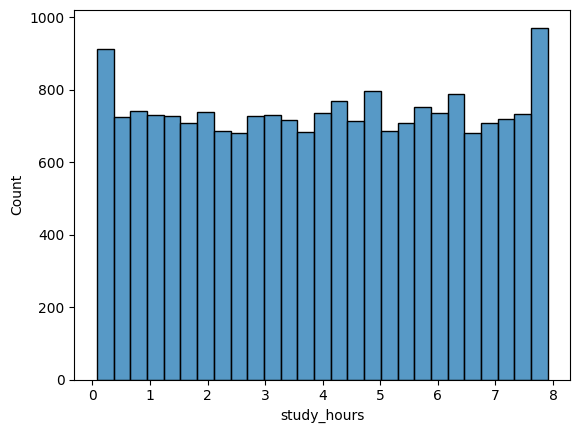

In [41]:
x=df['study_hours']
sns.histplot(data=df, x=x)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn. compose import ColumnTransformer
import pandas as pd

# 1. Définir X (sans exam_score)
X = df.drop(columns=['exam_score'])
y = df['exam_score']

# 2. Créer les pipelines
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 3. ColumnTransformer
preprocess = ColumnTransformer([
    ('num', num_pipeline, X.select_dtypes(exclude='object').columns.tolist()),
    ('cat', cat_pipeline, X.select_dtypes(include='object').columns.tolist())
])

# 4. Fit et transform sur X complet
X_transformed = preprocess.fit_transform(X)

# 5. Récupérer les noms de colonnes
feature_names = preprocess.get_feature_names_out()
print("Colonnes après transformation:", feature_names)

# 6. Convertir en DataFrame (optionnel)
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# 7. ENSUITE le split
x_train, x_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42
)

print(f"Shape x_train: {x_train.shape}")
print(f"Shape x_test: {x_test.shape}")

Colonnes après transformation: ['num__student_id' 'num__age' 'num__study_hours' 'num__class_attendance'
 'num__sleep_hours' 'cat__gender_female' 'cat__gender_male'
 'cat__gender_other' 'cat__course_b.com' 'cat__course_b.sc'
 'cat__course_b.tech' 'cat__course_ba' 'cat__course_bba' 'cat__course_bca'
 'cat__course_diploma' 'cat__internet_access_no'
 'cat__internet_access_yes' 'cat__sleep_quality_average'
 'cat__sleep_quality_good' 'cat__sleep_quality_poor'
 'cat__study_method_coaching' 'cat__study_method_group study'
 'cat__study_method_mixed' 'cat__study_method_online videos'
 'cat__study_method_self-study' 'cat__facility_rating_high'
 'cat__facility_rating_low' 'cat__facility_rating_medium'
 'cat__exam_difficulty_easy' 'cat__exam_difficulty_hard'
 'cat__exam_difficulty_moderate']
Shape x_train: (14000, 31)
Shape x_test: (6000, 31)


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)

In [35]:
slope=model.coef_[0]
slope

-0.012952871794868839

In [36]:
intercept=model.intercept_
intercept

62.4576715333875

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
mse

95.2122679117154

In [29]:
r2

0.7362290173157793

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA (n_components=8)
pca.fit(X_transformed_df)

PCA(n_components=8)

In [33]:
PCA(print(pca.explained_variance_ratio_))

[0.10608674 0.10547886 0.10503366 0.10429128 0.10365043 0.04088298
 0.0356616  0.03542171]


PCA()

In [44]:
new_datapoint=pd.DataFrame.from_dict({'num__study_hours':[7.91]})

In [47]:
prediction=model.predict(new_datapoint)
prediction

/home/matthieumouillon/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 31 features as input.